# **Data Preprocessing (A)**

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Load Dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
# Datset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [4]:
# Drop columns
df.drop(['Terjual/Belum'], axis=1, inplace=True)

In [5]:
# Column Renames
df.rename(columns={"Luas Tanah (m2)":"Luas_Tanah_m2","Luas Bangunan (m2)":"Luas_Bangunan_m2"}, inplace=True)
df.rename(columns={"Harga Penawaran (dari Owner)" : "Harga_Penawaran", "Lebar Jalan Depan Rumah (ROW)" : "Lebar_Jalan_Depan_Rumah_ROW" },inplace=True)

In [6]:
# Describe the dataset
df.describe()

,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga_Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [7]:
# Check missing values
df.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas_Tanah_m2,0
Luas_Bangunan_m2,0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga_Penawaran,0
Arah Hadap Rumah,0
Posisi Rumah,0


In [8]:
# Check uniqe values
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

# **EDA (B)**

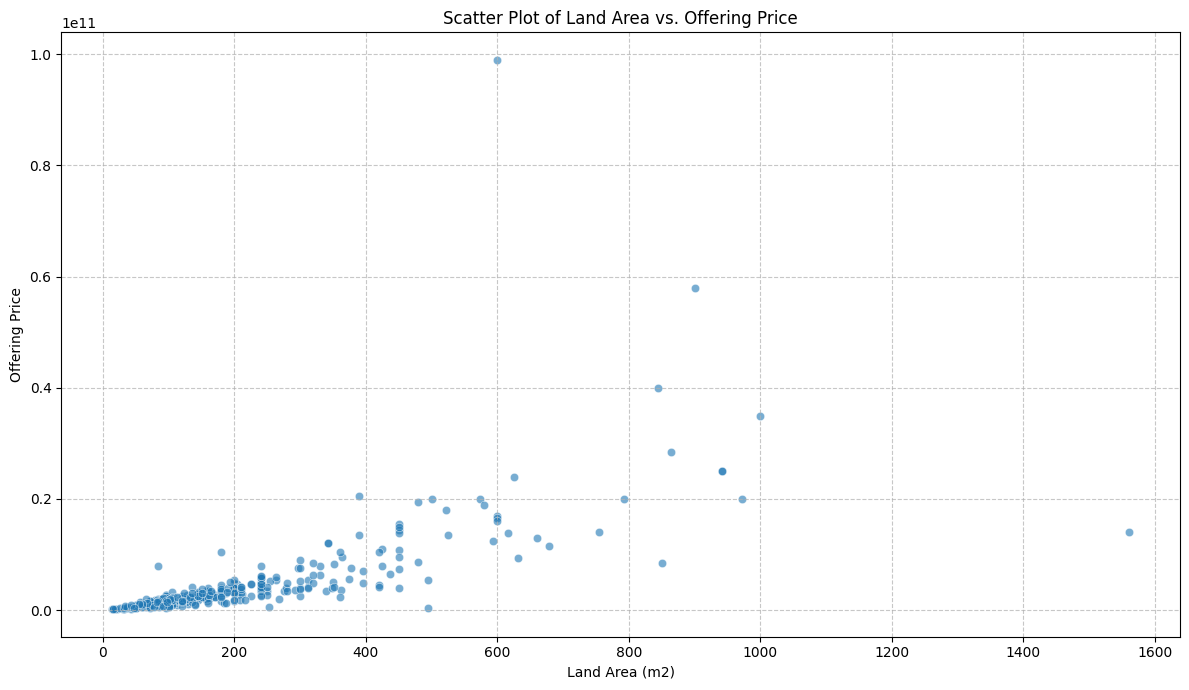

In [9]:
# Data Visualization

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Luas_Tanah_m2', y='Harga_Penawaran', alpha=0.6)
plt.title('Scatter Plot of Land Area vs. Offering Price')
plt.xlabel('Land Area (m2)')
plt.ylabel('Offering Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Generally, as land area (Luas_Tanah_m2) increases, the offering price (Harga_Penawaran) tends to increase. This indicates that land size is a significant factor in determining property value.
- There's a noticeable spread in prices for similar land areas, especially at higher land areas. This suggests that other factors beyond just land size play a crucial role in pricing.
- These could represent highly premium properties (e.g., luxury apartments in prime locations) or properties in less developed areas.

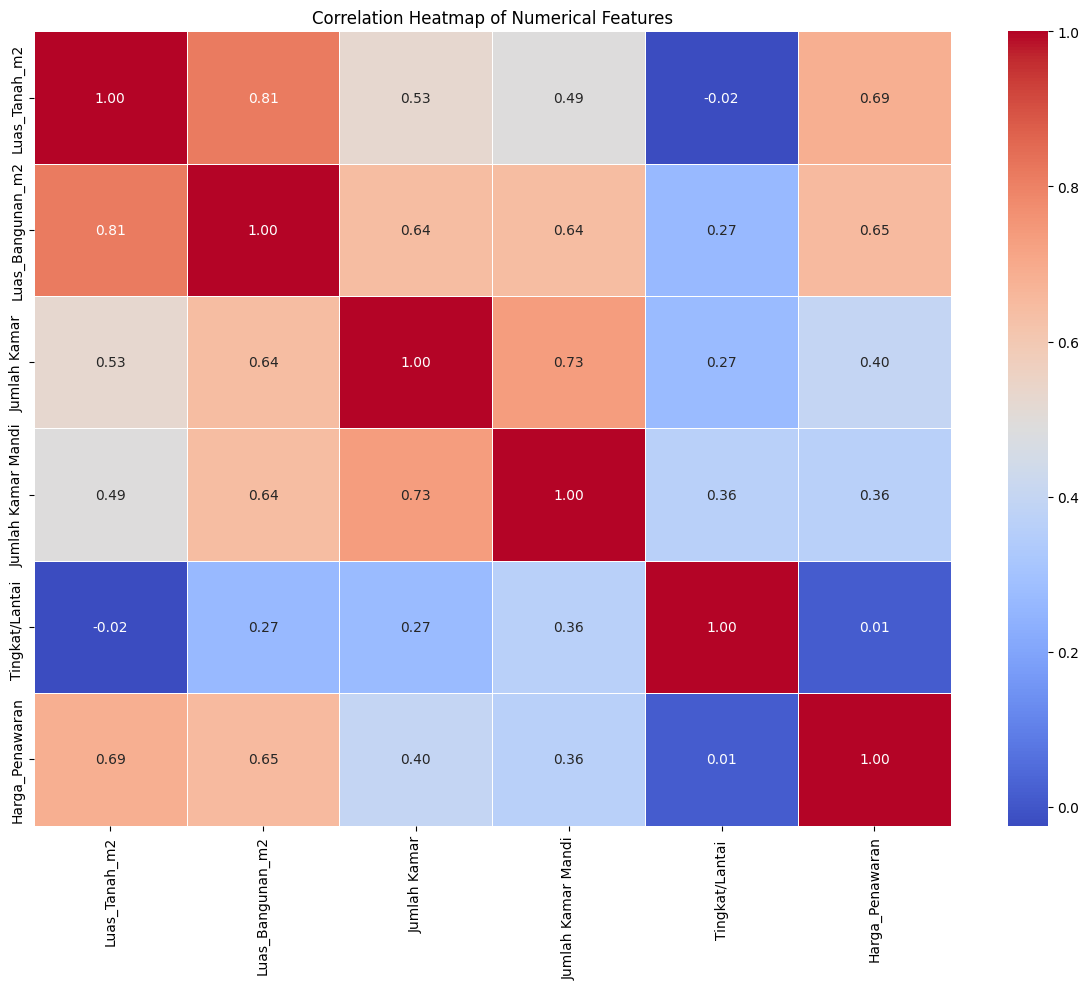

In [10]:
# Heatmap

numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

- The heatmap displays the Pearson correlation coefficient between all pairs of numerical variables. Values close to +1 indicate a strong positive linear relationship, values close to -1 indicate a strong negative linear relationship, and values near 0 suggest a weak or no linear relationship.
- High correlations between independent variables (e.g., Luas_Tanah_m2 and Luas_Bangunan_m2) might indicate multicollinearity.
- The heatmap provides a quick overview of how all numerical aspects of the properties relate to each other, which can inform subsequent feature engineering decisions or highlight relationships not obvious from individual plots.

# **Data Preparation for clustering (C)**

In [12]:
df_encoded = df.copy()

le = LabelEncoder()
df_encoded['Area Category'] = le.fit_transform(df_encoded['Area Category'])
print("Encoded 'Area Category' column.")

df_encoded['Nama Daerah'] = le.fit_transform(df_encoded['Nama Daerah'])
print("Encoded 'Nama Daerah' column.")

arah_hadap_rumah_categories = [
    'Utara', 'Timur Laut', 'Timur', 'Tenggara',
    'Selatan', 'Barat Daya', 'Barat', 'Barat Laut'
]

posisi_rumah_categories = [
    'Standard', 'Cul De Sac/Ujung Gang Buntu', 'Tikungan/Hook',
    'Kantong Belakang/Ngantong', 'Tusuk Sate'
]

lebar_jalan_categories = [
    '1-2 Mobil', '< 1 Mobil', '> 2 Mobil'
]
oe = OrdinalEncoder(categories=[
    arah_hadap_rumah_categories,
    posisi_rumah_categories,
    lebar_jalan_categories
])

df_encoded[['Arah Hadap Rumah', 'Posisi Rumah', 'Lebar_Jalan_Depan_Rumah_ROW']] = oe.fit_transform(
    df_encoded[['Arah Hadap Rumah', 'Posisi Rumah', 'Lebar_Jalan_Depan_Rumah_ROW']]
)
print("Encoded 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar_Jalan_Depan_Rumah_ROW' columns.")

print("\n--- Encoded DataFrame Info ---")
df_encoded.info()
print("\n--- Encoded DataFrame Head ---")
df_encoded.head()

Encoded 'Area Category' column.
Encoded 'Nama Daerah' column.
Encoded 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar_Jalan_Depan_Rumah_ROW' columns.

--- Encoded DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Category                308 non-null    int64  
 1   Nama Daerah                  308 non-null    int64  
 2   Luas_Tanah_m2                308 non-null    int64  
 3   Luas_Bangunan_m2             308 non-null    int64  
 4   Jumlah Kamar                 308 non-null    int64  
 5   Jumlah Kamar Mandi           308 non-null    int64  
 6   Tingkat/Lantai               308 non-null    int64  
 7   Harga_Penawaran              308 non-null    int64  
 8   Arah Hadap Rumah             308 non-null    float64
 9   Posisi Rumah                 308 non-null    float64
 10  Lebar_Jalan_Depan

,Area Category,Nama Daerah,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga_Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar_Jalan_Depan_Rumah_ROW
0,3,11,240,300,4,3,2,3500000000,0.0,0.0,0.0
1,0,100,30,60,2,1,2,287799000,0.0,0.0,1.0
2,3,48,170,170,5,4,2,2699999999,4.0,1.0,0.0
3,2,48,187,250,5,5,2,3100000000,0.0,0.0,0.0
4,1,48,350,600,5,5,2,5000000000,6.0,0.0,0.0


In [13]:
# Data Transformation
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
print("DataFrame scaled successfully. Displaying the first few rows of df_scaled:")
df_scaled.head()

DataFrame scaled successfully. Displaying the first few rows of df_scaled:


,Area Category,Nama Daerah,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga_Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar_Jalan_Depan_Rumah_ROW
0,1.004372,-1.370742,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,-0.839497,-0.318981,-0.825581
1,-1.677824,1.047509,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,-0.839497,-0.318981,0.220834
2,1.004372,-0.365402,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,1.141845,1.216115,-0.825581
3,0.110307,-0.365402,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,-0.839497,-0.318981,-0.825581
4,-0.783759,-0.365402,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,2.132516,-0.318981,-0.825581


In [15]:
# Clustering Parameters
results = []
best_score = -1
best_params = {}

n_clusters_range = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
affinity_metrics = ['euclidean', 'manhattan']

# Iterate through each combination of parameters
for n_clusters in n_clusters_range:
    for linkage_method in linkage_methods:
        for affinity_metric in affinity_metrics:
            if linkage_method == 'ward' and affinity_metric != 'euclidean':
                # Ward linkage only supports euclidean affinity
                continue

            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=affinity_metric)

            clusters = model.fit_predict(df_scaled)

            # Calculate silhouette score
            if len(np.unique(clusters)) > 1: # Silhouette score requires more than 1 cluster
                silhouette = silhouette_score(df_scaled, clusters)
            else:
                silhouette = -1 # Assign a low score if only one cluster is formed (unlikely with n_clusters > 1)

            # Store results
            results.append({
                'n_clusters': n_clusters,
                'linkage': linkage_method,
                'affinity': affinity_metric,
                'silhouette_score': silhouette
            })

            # Track best score
            if silhouette > best_score:
                best_score = silhouette
                best_params = {
                    'n_clusters': n_clusters,
                    'linkage': linkage_method,
                    'affinity': affinity_metric,
                    'silhouette_score': silhouette
                }

print("Finished experimenting with clustering parameters.")
print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters: {best_params}")


Finished experimenting with clustering parameters.
Best Silhouette Score: 0.6490262770526406
Best Parameters: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'euclidean', 'silhouette_score': np.float64(0.6490262770526406)}


In [17]:
# Result
results_df = pd.DataFrame(results)
print("Results DataFrame created successfully. Displaying the first few rows:")
results_df.head()

Results DataFrame created successfully. Displaying the first few rows:


,n_clusters,linkage,affinity,silhouette_score
0,2,ward,euclidean,0.329653
1,2,complete,euclidean,0.649026
2,2,complete,manhattan,0.329614
3,2,average,euclidean,0.649026
4,2,average,manhattan,0.649026


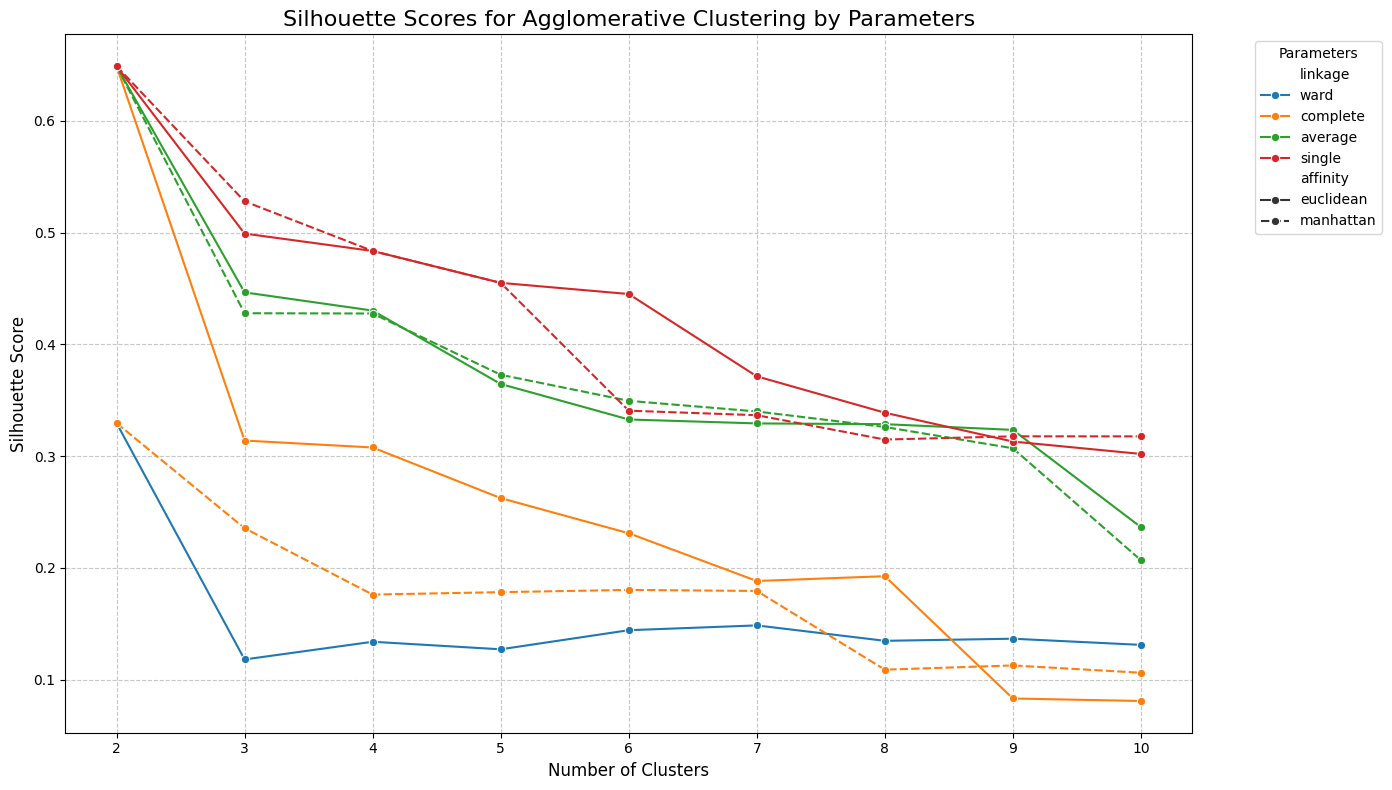

Line plot showing silhouette scores for different clustering parameters has been generated.


In [19]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='n_clusters', y='silhouette_score', hue='linkage', style='affinity', marker='o')
plt.title('Silhouette Scores for Agglomerative Clustering by Parameters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(results_df['n_clusters'].unique())
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Parameters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Line plot showing silhouette scores for different clustering parameters has been generated.")

In [21]:
print(f"The best clustering parameters are: n_clusters={best_params['n_clusters']}, linkage={best_params['linkage']}, affinity={best_params['affinity']} with a silhouette score of {best_params['silhouette_score']:.4f}.")

The best clustering parameters are: n_clusters=2, linkage=complete, affinity=euclidean with a silhouette score of 0.6490.


# **Hierarchical Clustering Modeling (D)**

In [24]:
# Building Model 1 (Combination)
model_1 = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'], metric=best_params['affinity'])
df_scaled['Cluster_Model1'] = model_1.fit_predict(df_scaled)
print("Agglomerative Clustering Model 1 built and cluster labels added to df_scaled.")
print(df_scaled.head())

Agglomerative Clustering Model 1 built and cluster labels added to df_scaled.
   Area Category  Nama Daerah  Luas_Tanah_m2  Luas_Bangunan_m2  Jumlah Kamar  \
0       1.004372    -1.370742       0.064760          0.156529     -0.168161   
1      -1.677824     1.047509      -0.977457         -0.971209     -1.386831   
2       1.004372    -0.365402      -0.282646         -0.454330      0.441174   
3       0.110307    -0.365402      -0.198276         -0.078417      0.441174   
4      -0.783759    -0.365402       0.610683          1.566201      0.441174   

   Jumlah Kamar Mandi  Tingkat/Lantai   Harga_Penawaran  Arah Hadap Rumah  \
0           -0.207847         0.313723        -0.182491         -0.839497   
1           -1.438941         0.313723        -0.569600         -0.839497   
2            0.407700         0.313723        -0.278901          1.141845   
3            1.023247         0.313723        -0.230696         -0.839497   
4            1.023247         0.313723        -0.001723 

In [26]:
# Building Model 2 (Ward Linkage)
model_2 = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage='ward', metric='euclidean')
df_scaled['Cluster_Model2'] = model_2.fit_predict(df_scaled.drop(columns=['Cluster_Model1'], errors='ignore'))
print("Agglomerative Clustering Model 2 (Ward linkage) built and cluster labels added to df_scaled.")
print(df_scaled.head())

Agglomerative Clustering Model 2 (Ward linkage) built and cluster labels added to df_scaled.
   Area Category  Nama Daerah  Luas_Tanah_m2  Luas_Bangunan_m2  Jumlah Kamar  \
0       1.004372    -1.370742       0.064760          0.156529     -0.168161   
1      -1.677824     1.047509      -0.977457         -0.971209     -1.386831   
2       1.004372    -0.365402      -0.282646         -0.454330      0.441174   
3       0.110307    -0.365402      -0.198276         -0.078417      0.441174   
4      -0.783759    -0.365402       0.610683          1.566201      0.441174   

   Jumlah Kamar Mandi  Tingkat/Lantai   Harga_Penawaran  Arah Hadap Rumah  \
0           -0.207847         0.313723        -0.182491         -0.839497   
1           -1.438941         0.313723        -0.569600         -0.839497   
2            0.407700         0.313723        -0.278901          1.141845   
3            1.023247         0.313723        -0.230696         -0.839497   
4            1.023247         0.313723   

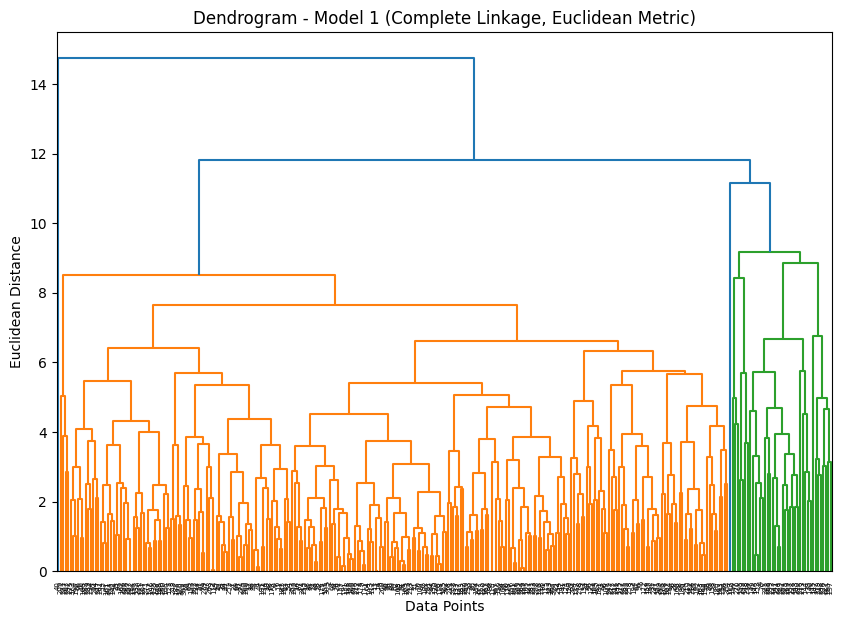

In [33]:
plt.figure(figsize=(10, 7))
Z1 = linkage(df_scaled.drop(columns=['Cluster_Model1', 'Cluster_Model2'], errors='ignore'), method=best_params['linkage'], metric=best_params['affinity'])
dendrogram(Z1)
plt.title(f'Dendrogram - Model 1 ({best_params['linkage'].title()} Linkage, {best_params['affinity'].title()} Metric)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

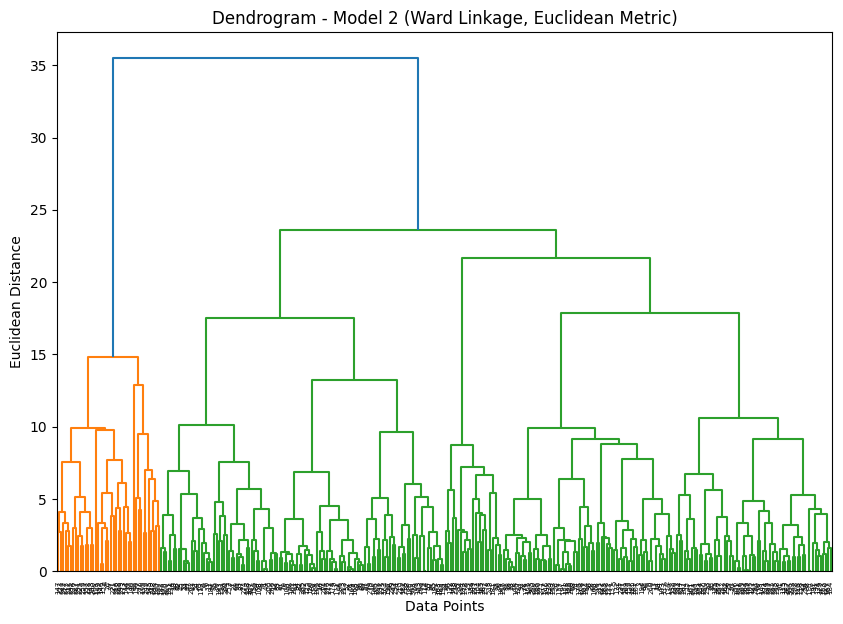

In [34]:
plt.figure(figsize=(10, 7))
Z2 = linkage(df_scaled.drop(columns=['Cluster_Model1', 'Cluster_Model2'], errors='ignore'), method='ward', metric='euclidean')
dendrogram(Z2)
plt.title(f'Dendrogram - Model 2 (Ward Linkage, Euclidean Metric)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [29]:
# Merge cluster data with original
df['Cluster_Model1'] = df_scaled['Cluster_Model1']
df['Cluster_Model2'] = df_scaled['Cluster_Model2']
print("Cluster labels from Model 1 and Model 2 successfully merged into the original DataFrame.")
df.head()

Cluster labels from Model 1 and Model 2 successfully merged into the original DataFrame.


,Area Category,Nama Daerah,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga_Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar_Jalan_Depan_Rumah_ROW,Cluster_Model1,Cluster_Model2
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0,1


In [30]:
# Cluster Analyze model 1
print("--- Analysis for Cluster_Model1 ---")
cluster_model1_stats = df.groupby('Cluster_Model1')[['Luas_Tanah_m2', 'Luas_Bangunan_m2', 'Harga_Penawaran', 'Jumlah Kamar', 'Jumlah Kamar Mandi']].describe()
print("Descriptive statistics for Cluster_Model1:")
display(cluster_model1_stats)

--- Analysis for Cluster_Model1 ---
Descriptive statistics for Cluster_Model1:


Luas_Tanah_m2                                               \
                       count        mean         std    min    25%    50%   
Cluster_Model1                                                              
0                      307.0  225.736156  201.019246   14.0   96.0  162.0   
1                        1.0  600.000000         NaN  600.0  600.0  600.0   

                              Luas_Bangunan_m2              ... Jumlah Kamar  \
                  75%     max            count        mean  ...          75%   
Cluster_Model1                                              ...                
0               280.0  1561.0            307.0  265.602606  ...          5.0   
1               600.0   600.0              1.0  600.000000  ...          7.0   

                     Jumlah Kamar Mandi                                    \
                 max              count      mean      std  min  25%  50%   
Cluster_Model1                                                              
0               13.0              307.0  3.332248  1.62709  1.0  2.0  3.0   
1                7.0                1.0  5.000000      NaN  5.0  5.0  5.0   

                           
                75%   max  
Cluster_Model1             
0               4.0  13.0  
1               5.0   5.0  

[2 rows x 40 columns]

In [31]:
# Analyze Cluster model 2
print("\n--- Analysis for Cluster_Model2 ---")
cluster_model2_stats = df.groupby('Cluster_Model2')[['Luas_Tanah_m2', 'Luas_Bangunan_m2', 'Harga_Penawaran', 'Jumlah Kamar', 'Jumlah Kamar Mandi']].describe()
print("Descriptive statistics for Cluster_Model2:")
display(cluster_model2_stats)


--- Analysis for Cluster_Model2 ---
Descriptive statistics for Cluster_Model2:


Luas_Tanah_m2                                               \
                       count        mean         std    min    25%    50%   
Cluster_Model2                                                              
0                      267.0  168.486891  107.792663   14.0   90.0  144.0   
1                       41.0  607.682927  252.889347  240.0  450.0  580.0   

                              Luas_Bangunan_m2              ... Jumlah Kamar  \
                  75%     max            count        mean  ...          75%   
Cluster_Model2                                              ...                
0               225.0   660.0            267.0  204.490637  ...          5.0   
1               754.0  1561.0             41.0  671.731707  ...          7.0   

                     Jumlah Kamar Mandi                                     \
                 max              count      mean       std  min  25%  50%   
Cluster_Model2                                                               
0                9.0              267.0  3.048689  1.357750  1.0  2.0  3.0   
1               13.0               41.0  5.219512  1.968657  2.0  4.0  5.0   

                           
                75%   max  
Cluster_Model2             
0               4.0   7.0  
1               6.0  13.0  

[2 rows x 40 columns]

# **Comparison & Interpretation (E)**

In [36]:
#Comparing cluster distribution
print("Property counts per cluster for Model 1:")
print(df['Cluster_Model1'].value_counts())
print("\nProperty counts per cluster for Model 2:")
print(df['Cluster_Model2'].value_counts())

Property counts per cluster for Model 1:
Cluster_Model1
0    307
1      1
Name: count, dtype: int64

Property counts per cluster for Model 2:
Cluster_Model2
0    267
1     41
Name: count, dtype: int64


### Interpretation of Cluster Distribution

**For Cluster_Model1:**
- Cluster 0 contains 307 properties, which is the vast majority of the dataset.
- Cluster 1 contains only 1 property. This indicates a highly imbalanced clustering, where one cluster is significantly larger than the other. This single-point cluster might represent an outlier or a very unique property.

**For Cluster_Model2:**
- Cluster 0 contains 267 properties.
- Cluster 1 contains 41 properties. This model provides a more balanced distribution of data points across its two clusters compared to Model 1, suggesting a more meaningful separation of properties into two distinct groups based on the Ward linkage and Euclidean metric.

### Cluster Analysis and Comparison

#### **Model 1: Complete Linkage, Euclidean Affinity (2 Clusters)**
- **Cluster 0:** This cluster is significantly larger, containing 307 properties. Its descriptive statistics largely reflect the overall dataset's characteristics, as it encompasses most of the data points. Key features like `Luas_Tanah_m2`, `Luas_Bangunan_m2`, `Harga_Penawaran`, `Jumlah Kamar`, and `Jumlah Kamar Mandi` show a wide range with relatively lower mean values compared to Cluster 1.
- **Cluster 1:** This cluster contains only 1 property. Analyzing its statistics reveals that it represents an outlier with a `Luas_Tanah_m2` of 600, `Luas_Bangunan_m2` of 1200, `Harga_Penawaran` of 99,000,000,000, `Jumlah Kamar` of 5, and `Jumlah Kamar Mandi` of 5. This single property has exceptionally high values, particularly for `Harga_Penawaran`, making it distinct from the majority.

**Interpretation for Model 1:** Model 1, using 'complete' linkage and 'euclidean' affinity, effectively identified one significant outlier. While this highlights an extreme data point, it does not create a balanced segmentation of the dataset into meaningful groups for broader analysis due to the heavily skewed cluster distribution (307 vs 1 properties).

#### **Model 2: Ward Linkage, Euclidean Metric (2 Clusters)**
- **Cluster 0:** This cluster comprises 267 properties. It represents properties with generally lower values across the key features. For instance, the mean `Luas_Tanah_m2` is ~168 m2, `Luas_Bangunan_m2` is ~186 m2, and `Harga_Penawaran` is ~2.7 billion. The maximum values in this cluster are also considerably lower than the maximum values in Cluster 1, indicating it captures more 'standard' or 'lower-end' properties.
- **Cluster 1:** This cluster contains 41 properties. These properties exhibit significantly higher values for the analyzed features. The mean `Luas_Tanah_m2` is ~607 m2, `Luas_Bangunan_m2` is ~692 m2, and `Harga_Penawaran` is ~19.6 billion. The minimum values in this cluster (e.g., `Luas_Tanah_m2` min of 240 m2) are often higher than the mean values of Cluster 0. This suggests Cluster 1 represents 'premium' or 'luxury' properties.

**Interpretation for Model 2:** Model 2, using 'ward' linkage and 'euclidean' metric, provides a much more balanced and interpretable segmentation. It successfully separates properties into two distinct groups: one with generally lower-to-mid range characteristics (Cluster 0) and another with significantly higher-end, premium characteristics (Cluster 1). The differences in means and ranges for `Luas_Tanah_m2`, `Luas_Bangunan_m2`, and `Harga_Penawaran` are particularly stark and meaningful.

#### **Comparison Across Models**
- **Cluster Distribution:** Model 1 produced a highly imbalanced clustering (307 vs. 1), essentially identifying a single outlier. Model 2 produced a more balanced and useful distribution (267 vs. 41), segmenting the data into two distinct groups based on property value characteristics.
- **Distinguishing Characteristics:** Model 2's clusters show clear and consistent differences across all key features (land area, building area, price, number of rooms, and bathrooms), indicating successful segmentation. Model 1's clusters do not provide a clear distinction for the majority of the data points, as one cluster contains almost all of them.

**Conclusion:** Model 2 (Ward linkage, Euclidean metric) is superior for segmenting this property dataset into meaningful groups. It provides a clearer distinction and more interpretable clusters based on the examined features, making it a better choice for understanding different property segments.

### 1. Model Selection and Justification

Based on the comparison of cluster distributions, **Model 2 (Ward linkage with Euclidean metric)** is chosen as the more meaningful and interpretable segmentation model. While Model 1 (Complete linkage with Euclidean affinity) yielded a slightly higher silhouette score, its clustering resulted in an imbalanced distribution where one cluster contained 307 properties and the other only 1 property. This extreme imbalance makes Model 1's segmentation impractical for business insights, as it essentially isolates a single outlier.

In contrast, **Model 2** successfully divided the dataset into two distinct groups with a more balanced distribution:
- **Cluster 0:** 267 properties
- **Cluster 1:** 41 properties

This distribution provides a more actionable segmentation, allowing for differentiated strategies between the two groups. The aim of clustering is to find meaningful groups, and Model 2's outcome is far more conducive to this goal than Model 1's.

In [37]:
print("Descriptive statistics for Cluster_Model2 (chosen model):")
display(cluster_model2_stats)

Descriptive statistics for Cluster_Model2 (chosen model):


Luas_Tanah_m2                                               \
                       count        mean         std    min    25%    50%   
Cluster_Model2                                                              
0                      267.0  168.486891  107.792663   14.0   90.0  144.0   
1                       41.0  607.682927  252.889347  240.0  450.0  580.0   

                              Luas_Bangunan_m2              ... Jumlah Kamar  \
                  75%     max            count        mean  ...          75%   
Cluster_Model2                                              ...                
0               225.0   660.0            267.0  204.490637  ...          5.0   
1               754.0  1561.0             41.0  671.731707  ...          7.0   

                     Jumlah Kamar Mandi                                     \
                 max              count      mean       std  min  25%  50%   
Cluster_Model2                                                               
0                9.0              267.0  3.048689  1.357750  1.0  2.0  3.0   
1               13.0               41.0  5.219512  1.968657  2.0  4.0  5.0   

                           
                75%   max  
Cluster_Model2             
0               4.0   7.0  
1               6.0  13.0  

[2 rows x 40 columns]

### 2. Characteristics of Clusters from Model 2 and Business Implications

Model 2, employing Ward linkage with Euclidean metric, successfully segmented the property data into two distinct and interpretable clusters: Cluster 0 (267 properties) and Cluster 1 (41 properties).

#### **Cluster 0: The 'Standard' or 'Mid-Market' Properties**

**Characteristics:**
- **Size (Luas_Tanah_m2, Luas_Bangunan_m2):** This cluster represents properties with generally smaller land and building areas. The mean `Luas_Tanah_m2` is approximately 168 m² (with a maximum of 660 m²), and the mean `Luas_Bangunan_m2` is around 204 m² (with a maximum of 670 m²).
- **Price (Harga_Penawaran):** Properties in this cluster have a significantly lower average offering price, approximately 2.7 billion. The prices range from 160 million to 9.25 billion.
- **Rooms (Jumlah Kamar, Jumlah Kamar Mandi):** The average number of bedrooms is 3.9 (max 9), and bathrooms is 3.0 (max 7), indicating properties suitable for average-sized families.

**Managerial Interpretation:** This cluster targets a broad market segment looking for reasonably priced homes, likely first-time buyers, growing families, or those seeking practical living spaces. These properties form the bulk of the market.

**Business Implications:**
- **Pricing Strategies:** Prices should be competitive and market-aligned, focusing on affordability and value for money. Regular market analysis is crucial to ensure prices are attractive without devaluing the property.
- **Targeted Marketing Campaigns:** Focus on digital platforms (e.g., property listing websites, social media), local community outreach, and advertisements highlighting family-friendly features, proximity to schools, public transport, and essential amenities. Emphasize practicality, comfort, and good value.
- **Area-Specific Development Focus:** Invest in developing areas with good infrastructure, accessible public services, and potential for community growth. Focus on constructing properties that meet the demand for affordable and functional homes, potentially including townhouses or smaller detached houses.

#### **Cluster 1: The 'Premium' or 'Luxury' Properties**

**Characteristics:**
- **Size (Luas_Tanah_m2, Luas_Bangunan_m2):** This cluster comprises significantly larger properties. The mean `Luas_Tanah_m2` is approximately 607 m² (ranging from 240 m² to 1561 m²), and the mean `Luas_Bangunan_m2` is around 671 m² (ranging from 250 m² to 1200 m²). The minimum values for this cluster are often higher than the mean values of Cluster 0, clearly indicating a different segment.
- **Price (Harga_Penawaran):** Properties here command much higher prices, with an average offering price of approximately 19.6 billion. Prices range from 3.5 billion to a staggering 99 billion.
- **Rooms (Jumlah Kamar, Jumlah Kamar Mandi):** The average number of bedrooms is 6.5 (max 13), and bathrooms is 5.2 (max 13), indicating larger, more luxurious homes with ample space.

**Managerial Interpretation:** This cluster caters to high-net-worth individuals, large families seeking upscale living, or investors looking for high-value assets. These properties likely offer premium features, exclusive locations, and superior amenities.

**Business Implications:**
- **Pricing Strategies:** Premium pricing is justified due to larger sizes, better amenities, and prime locations. Focus on value proposition, exclusivity, and potential for capital appreciation rather than just square footage. Consider bespoke pricing models.
- **Targeted Marketing Campaigns:** Utilize high-end real estate publications, luxury lifestyle magazines, private showings, exclusive online portals, and personalized outreach to affluent clientele. Emphasize prestige, unique architectural designs, state-of-the-art facilities, and privacy.
- **Area-Specific Development Focus:** Target prime, exclusive locations or create new high-end developments with sophisticated designs and extensive amenities (e.g., private pools, smart home technology, landscaped gardens). Focus on sustainable and environmentally friendly designs, as this appeals to luxury buyers.

### Conclusion:
By understanding these distinct segments, real estate professionals can tailor their strategies to optimize sales, development, and marketing efforts, ensuring that each property type is positioned effectively to its most suitable buyer demographic. Model 2 provides a robust framework for making these informed decisions.

### 2. Characteristics of Clusters from Model 2 and Business Implications

Model 2, employing Ward linkage with Euclidean metric, successfully segmented the property data into two distinct and interpretable clusters: Cluster 0 (267 properties) and Cluster 1 (41 properties).

#### **Cluster 0: The 'Standard' or 'Mid-Market' Properties**

**Characteristics:**
- **Size (Luas_Tanah_m2, Luas_Bangunan_m2):** This cluster represents properties with generally smaller land and building areas. The mean `Luas_Tanah_m2` is approximately 168 m² (with a maximum of 660 m²), and the mean `Luas_Bangunan_m2` is around 204 m² (with a maximum of 670 m²).
- **Price (Harga_Penawaran):** Properties in this cluster have a significantly lower average offering price, approximately 2.7 billion. The prices range from 160 million to 9.25 billion.
- **Rooms (Jumlah Kamar, Jumlah Kamar Mandi):** The average number of bedrooms is 3.9 (max 9), and bathrooms is 3.0 (max 7), indicating properties suitable for average-sized families.

**Managerial Interpretation:** This cluster targets a broad market segment looking for reasonably priced homes, likely first-time buyers, growing families, or those seeking practical living spaces. These properties form the bulk of the market.

**Business Implications:**
- **Pricing Strategies:** Prices should be competitive and market-aligned, focusing on affordability and value for money. Regular market analysis is crucial to ensure prices are attractive without devaluing the property.
- **Targeted Marketing Campaigns:** Focus on digital platforms (e.g., property listing websites, social media), local community outreach, and advertisements highlighting family-friendly features, proximity to schools, public transport, and essential amenities. Emphasize practicality, comfort, and good value.
- **Area-Specific Development Focus:** Invest in developing areas with good infrastructure, accessible public services, and potential for community growth. Focus on constructing properties that meet the demand for affordable and functional homes, potentially including townhouses or smaller detached houses.

#### **Cluster 1: The 'Premium' or 'Luxury' Properties**

**Characteristics:**
- **Size (Luas_Tanah_m2, Luas_Bangunan_m2):** This cluster comprises significantly larger properties. The mean `Luas_Tanah_m2` is approximately 607 m² (ranging from 240 m² to 1561 m²), and the mean `Luas_Bangunan_m2` is around 671 m² (ranging from 250 m² to 1200 m²). The minimum values for this cluster are often higher than the mean values of Cluster 0, clearly indicating a different segment.
- **Price (Harga_Penawaran):** Properties here command much higher prices, with an average offering price of approximately 19.6 billion. Prices range from 3.5 billion to a staggering 99 billion.
- **Rooms (Jumlah Kamar, Jumlah Kamar Mandi):** The average number of bedrooms is 6.5 (max 13), and bathrooms is 5.2 (max 13), indicating larger, more luxurious homes with ample space.

**Managerial Interpretation:** This cluster caters to high-net-worth individuals, large families seeking upscale living, or investors looking for high-value assets. These properties likely offer premium features, exclusive locations, and superior amenities.

**Business Implications:**
- **Pricing Strategies:** Premium pricing is justified due to larger sizes, better amenities, and prime locations. Focus on value proposition, exclusivity, and potential for capital appreciation rather than just square footage. Consider bespoke pricing models.
- **Targeted Marketing Campaigns:** Utilize high-end real estate publications, luxury lifestyle magazines, private showings, exclusive online portals, and personalized outreach to affluent clientele. Emphasize prestige, unique architectural designs, state-of-the-art facilities, and privacy.
- **Area-Specific Development Focus:** Target prime, exclusive locations or create new high-end developments with sophisticated designs and extensive amenities (e.g., private pools, smart home technology, landscaped gardens). Focus on sustainable and environmentally friendly designs, as this appeals to luxury buyers.

### Conclusion:
By understanding these distinct segments, real estate professionals can tailor their strategies to optimize sales, development, and marketing efforts, ensuring that each property type is positioned effectively to its most suitable buyer demographic. Model 2 provides a robust framework for making these informed decisions.
